In [257]:
import pandas as pd
import numpy as np
import random 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import gridspec

# Simulation3

In [258]:
NumSim = 5

In [259]:
df_runtimes_all = pd.read_excel("Graph1Sim1_500.xlsx")
df_runtimes_all = df_runtimes_all.drop(columns=['Unnamed: 0'])

In [260]:
t_max = int(df_runtimes_all["Timestamp_Polarization_Reached"].mean())

## 50 Suspectible Nodes

In [261]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
## Tmax defined below
N = 50
Z = 2  
P = 2
# t_max 

In [262]:
## Data Frame for graphing extremists 
df_extremists_50 = pd.DataFrame(np.nan, index=range(0,t_max + 1), columns= [0,1,2,3,4])
df_extremists_50

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
4506,NaN,NaN,NaN,NaN,NaN
4507,NaN,NaN,NaN,NaN,NaN
4508,NaN,NaN,NaN,NaN,NaN
4509,NaN,NaN,NaN,NaN,NaN


In [263]:
for k in range(0, NumSim):
    
     ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z + P)

    df_extremists_50.loc[i, k] = extremists

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(6)
        
    i = 0 

    print("Going into while", k)
    while(i < t_max):

    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
        ## Peacemaker only 
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and 
            one_peacemaker == False and both_peacemakers == False and 
            (sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z + P):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z + P)
        df_extremists_50.loc[i+1, k] = extremists
        i = i+1 
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    

0 - Initial Extremists: 0.1111111111111111
Going into while 0
0 - End Extremists: 0.1111111111111111
1 - Initial Extremists: 0.07407407407407407
Going into while 1
1 - End Extremists: 0.09259259259259259
2 - Initial Extremists: 0.09259259259259259
Going into while 2
2 - End Extremists: 0.1111111111111111
3 - Initial Extremists: 0.09259259259259259
Going into while 3
3 - End Extremists: 0.07407407407407407
4 - Initial Extremists: 0.09259259259259259
Going into while 4
4 - End Extremists: 0.07407407407407407


In [264]:
df_extremists_50.tail()

,0,1,2,3,4
4506,0.111111,0.092593,0.111111,0.074074,0.074074
4507,0.111111,0.092593,0.111111,0.074074,0.074074
4508,0.111111,0.092593,0.111111,0.074074,0.074074
4509,0.111111,0.092593,0.111111,0.074074,0.074074
4510,0.111111,0.092593,0.111111,0.074074,0.074074


In [286]:
#df_extremists_50.to_excel("Graph1Sim3_50.xlsx")

## 100 Suspectible Nodes

In [266]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
#t_max = 100000 
N = 100
Z = 4 
P = 4

In [267]:
## Data Frame for graphing extremists 
df_extremists_100 = pd.DataFrame(np.nan, index=range(0,t_max + 1), columns= [0,1,2,3,4])

In [268]:
for k in range(0, NumSim):
    
     ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z + P)

    df_extremists_100.loc[i, k] = extremists

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(6)
        
    i = 0 

    print("Going into while", k)
    while(i < t_max):

    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
        ## Peacemaker only 
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and 
            one_peacemaker == False and both_peacemakers == False and 
            (sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z + P):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z + P)
        df_extremists_100.loc[i+1, k] = extremists
        i = i+1 
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    

0 - Initial Extremists: 0.06481481481481481
Going into while 0
0 - End Extremists: 0.1388888888888889
1 - Initial Extremists: 0.08333333333333333
Going into while 1
1 - End Extremists: 0.08333333333333333
2 - Initial Extremists: 0.07407407407407407
Going into while 2
2 - End Extremists: 0.12962962962962962
3 - Initial Extremists: 0.08333333333333333
Going into while 3
3 - End Extremists: 0.10185185185185185
4 - Initial Extremists: 0.05555555555555555
Going into while 4
4 - End Extremists: 0.1111111111111111


In [287]:
#df_extremists_100.to_excel("Graph1Sim3_100.xlsx")

## 200 Suspectible Nodes

In [270]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
#t_max = 100000 
N = 200
Z = 10
P = 10

In [271]:
## Data Frame for graphing extremists 
df_extremists_200 = pd.DataFrame(np.nan, index=range(0,t_max + 1), columns= [0,1,2,3,4])

In [272]:
for k in range(0, NumSim):
    
     ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z + P)

    df_extremists_200.loc[i, k] = extremists

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(6)
        
    i = 0 

    print("Going into while", k)
    while(i < t_max):

    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
        ## Peacemaker only 
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and 
            one_peacemaker == False and both_peacemakers == False and 
            (sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z + P):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z + P)
        df_extremists_200.loc[i+1, k] = extremists
        i = i+1 
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    

0 - Initial Extremists: 0.07272727272727272
Going into while 0
0 - End Extremists: 0.1409090909090909
1 - Initial Extremists: 0.08181818181818182
Going into while 1
1 - End Extremists: 0.1318181818181818
2 - Initial Extremists: 0.09545454545454546
Going into while 2
2 - End Extremists: 0.14545454545454545
3 - Initial Extremists: 0.1
Going into while 3
3 - End Extremists: 0.14545454545454545
4 - Initial Extremists: 0.10909090909090909
Going into while 4
4 - End Extremists: 0.1409090909090909


In [288]:
#df_extremists_200.to_excel("Graph1Sim3_200.xlsx")

## 300 Suspectible Nodes

In [274]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
# t_max = 100000 
N = 300
Z = 14
P = 14

In [275]:
## Data Frame for graphing extremists 
df_extremists_300 = pd.DataFrame(np.nan, index=range(0,t_max + 1), columns= [0,1,2,3,4])

In [276]:
for k in range(0, NumSim):
    
     ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z + P)

    df_extremists_300.loc[i, k] = extremists

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(6)
        
    i = 0 

    print("Going into while", k)
    while(i < t_max):

    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
        ## Peacemaker only 
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and 
            one_peacemaker == False and both_peacemakers == False and 
            (sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z + P):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z + P)
        df_extremists_300.loc[i+1, k] = extremists
        i = i+1 
    
    ## Checking 
    print(k, "- End Extremists:", extremists)

0 - Initial Extremists: 0.09451219512195122
Going into while 0
0 - End Extremists: 0.11890243902439024
1 - Initial Extremists: 0.09146341463414634
Going into while 1
1 - End Extremists: 0.13109756097560976
2 - Initial Extremists: 0.07317073170731707
Going into while 2
2 - End Extremists: 0.13414634146341464
3 - Initial Extremists: 0.08536585365853659
Going into while 3
3 - End Extremists: 0.13414634146341464
4 - Initial Extremists: 0.10060975609756098
Going into while 4
4 - End Extremists: 0.11585365853658537


In [289]:
#df_extremists_300.to_excel("Graph1Sim3_300.xlsx")

## 400 Suspectible Nodes

In [278]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
#t_max = 100000 
N = 400
Z = 20
P = 20

In [279]:
## Data Frame for graphing extremists 
df_extremists_400 = pd.DataFrame(np.nan, index=range(0,t_max + 1), columns= [0,1,2,3,4])

In [280]:
for k in range(0, NumSim):
    
     ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z + P)

    df_extremists_400.loc[i, k] = extremists

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(6)
        
    i = 0 

    print("Going into while", k)
    while(i < t_max):

    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
        ## Peacemaker only 
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and 
            one_peacemaker == False and both_peacemakers == False and 
            (sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z + P):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z + P)
        df_extremists_400.loc[i+1, k] = extremists
        i = i+1 
    
    ## Checking 
    print(k, "- End Extremists:", extremists)

0 - Initial Extremists: 0.075
Going into while 0
0 - End Extremists: 0.12727272727272726
1 - Initial Extremists: 0.08863636363636364
Going into while 1
1 - End Extremists: 0.125
2 - Initial Extremists: 0.10227272727272728
Going into while 2
2 - End Extremists: 0.125
3 - Initial Extremists: 0.08181818181818182
Going into while 3
3 - End Extremists: 0.11818181818181818
4 - Initial Extremists: 0.07727272727272727
Going into while 4
4 - End Extremists: 0.12045454545454545


In [290]:
#df_extremists_400.to_excel("Graph1Sim3_400.xlsx")

## 500 Suspectible Nodes

In [282]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
# t_max = 100000 
N = 500
Z = 24
P = 24

In [283]:
## Data Frame for graphing extremists 
df_extremists_500 = pd.DataFrame(np.nan, index=range(0,t_max + 1), columns= [0,1,2,3,4])

In [284]:
for k in range(0, NumSim):
    
     ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df.iloc[0,] >= .8) + sum(df.iloc[0,] <= .2)) / (N + Z + P)

    df_extremists_500.loc[i, k] = extremists

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(6)
        
    i = 0 

    print("Going into while", k)
    while(i < t_max):

    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
        ## Peacemaker only 
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and 
            one_peacemaker == False and both_peacemakers == False and 
            (sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z + P):
            df.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df.iloc[i,] >= .8) + sum(df.iloc[i,] <= .2)) / (N + Z + P)
        df_extremists_500.loc[i+1, k] = extremists
        i = i+1 
    
    ## Checking 
    print(k, "- End Extremists:", extremists)

0 - Initial Extremists: 0.08211678832116788
Going into while 0
0 - End Extremists: 0.12956204379562045
1 - Initial Extremists: 0.0948905109489051
Going into while 1
1 - End Extremists: 0.1259124087591241
2 - Initial Extremists: 0.072992700729927
Going into while 2
2 - End Extremists: 0.10766423357664233
3 - Initial Extremists: 0.07664233576642336
Going into while 3
3 - End Extremists: 0.12408759124087591
4 - Initial Extremists: 0.08941605839416059
Going into while 4
4 - End Extremists: 0.13138686131386862


In [291]:
#df_extremists_500.to_excel("Graph1Sim3_500.xlsx")

## Graph

In [ ]:
# https://stackoverflow.com/questions/37737538/merge-matplotlib-subplots-with-shared-x-axis

In [292]:
x = range(0,t_max + 1)

In [293]:
## 50 nodes
y50_0 = df_extremists_50[0]
y50_1 = df_extremists_50[1]
y50_2 = df_extremists_50[2]
y50_3 = df_extremists_50[3]
y50_4 = df_extremists_50[4]
y50_mean = df_extremists_50.iloc[:, 0:5].mean(axis=1)

In [294]:
## 100 nodes 
y100_0 = df_extremists_100[0]
y100_1 = df_extremists_100[1]
y100_2 = df_extremists_100[2]
y100_3 = df_extremists_100[3]
y100_4 = df_extremists_100[4]
y100_mean = df_extremists_100.iloc[:, 0:5].mean(axis=1)

In [295]:
## 200 nodes
y200_0 = df_extremists_200[0]
y200_1 = df_extremists_200[1]
y200_2 = df_extremists_200[2]
y200_3 = df_extremists_200[3]
y200_4 = df_extremists_200[4]
y200_mean = df_extremists_200.iloc[:, 0:5].mean(axis=1)

In [296]:
## 300 nodes
y300_0 = df_extremists_300[0]
y300_1 = df_extremists_300[1]
y300_2 = df_extremists_300[2]
y300_3 = df_extremists_300[3]
y300_4 = df_extremists_300[4]
y300_mean = df_extremists_300.iloc[:, 0:5].mean(axis=1)

In [297]:
## 400 nodes
y400_0 = df_extremists_400[0]
y400_1 = df_extremists_400[1]
y400_2 = df_extremists_400[2]
y400_3 = df_extremists_400[3]
y400_4 = df_extremists_400[4]
y400_mean = df_extremists_400.iloc[:, 0:5].mean(axis=1)

In [298]:
## 500 nodes
y500_0 = df_extremists_500[0]
y500_1 = df_extremists_500[1]
y500_2 = df_extremists_500[2]
y500_3 = df_extremists_500[3]
y500_4 = df_extremists_500[4]
y500_mean = df_extremists_500.iloc[:, 0:5].mean(axis=1)

In [299]:
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html

<Figure size 432x288 with 0 Axes>

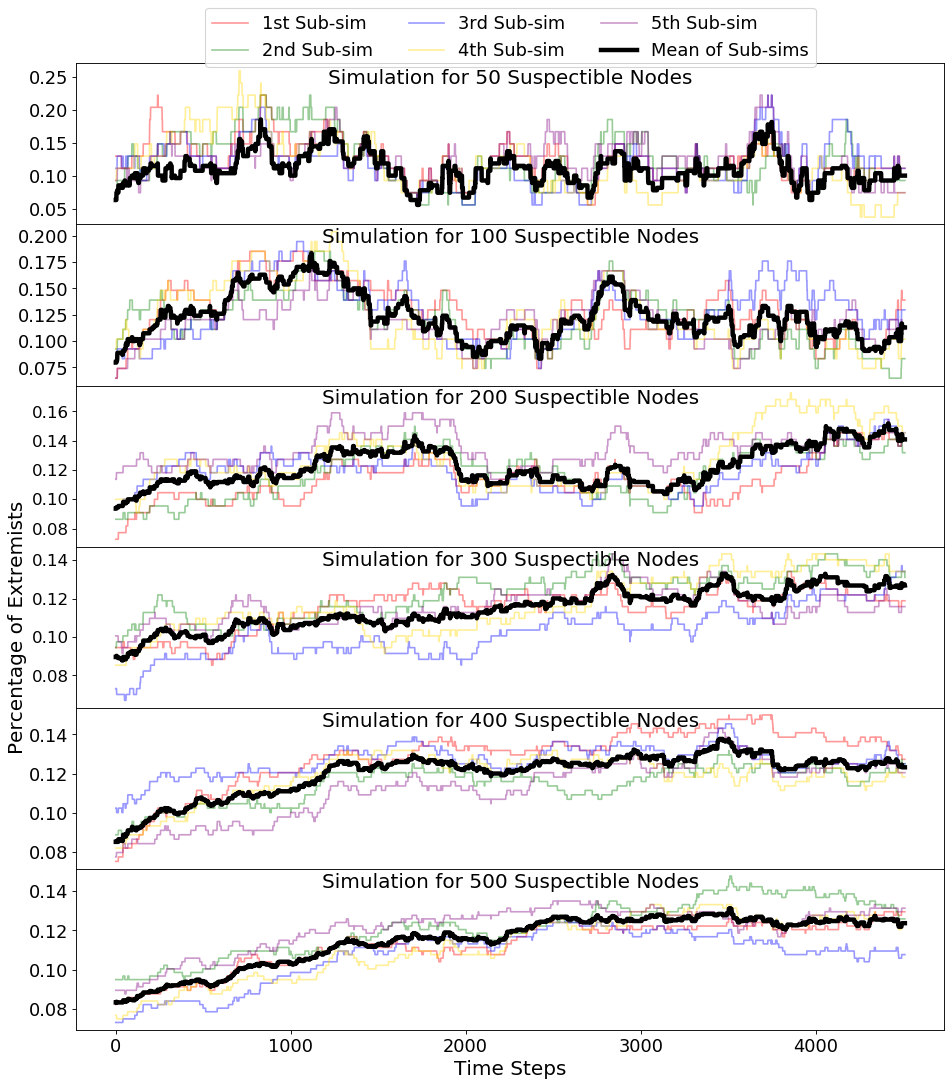

In [311]:
fig = plt.figure()
figure(figsize=(14, 16), dpi=80)

# set height ratios for subplots
gs = gridspec.GridSpec(6, 1, height_ratios=[2, 2, 2, 2, 2, 2]) 

# Nodes = 50
ax0 = plt.subplot(gs[0])
line50, = ax0.plot(x, y50_0, color='red', alpha=0.4)
line501, = ax0.plot(x, y50_1, color='green', alpha=0.4)
line502, = ax0.plot(x, y50_2, color='blue', alpha=0.4)
line503, = ax0.plot(x, y50_3, color='gold', alpha=0.4)
line504, = ax0.plot(x, y50_4, color='purple', alpha=0.4)
line50mean, = ax0.plot(x, y_mean, color='black', linewidth=4)
plt.legend((line50, line501, line502, line503, line504, line50mean), 
           ('1st Sub-sim', '2nd Sub-sim', '3rd Sub-sim', '4th Sub-sim', '5th Sub-sim','Mean of Sub-sims'), loc = "upper center", bbox_to_anchor=(0.5, 1.4),
          ncol=3,fontsize=16)
plt.yticks(fontsize = 16)


# Nodes = 100
ax1 = plt.subplot(gs[1], sharex = ax0)
line100, = ax1.plot(x, y100_0, color='red', alpha=0.4)
line1001, = ax1.plot(x, y100_1, color='green', alpha=0.4)
line1002, = ax1.plot(x, y100_2, color='blue', alpha=0.4)
line1003, = ax1.plot(x, y100_3, color='gold', alpha=0.4)
line1004, = ax1.plot(x, y100_4, color='purple', alpha=0.4)
line100mean, = ax1.plot(x, y100_mean, color='black', linewidth=4)
plt.yticks(fontsize = 16)

# Nodes = 200
ax2 = plt.subplot(gs[2], sharex = ax0)
line200, = ax2.plot(x, y200_0, color='red', alpha=0.4)
line2001, = ax2.plot(x, y200_1, color='green', alpha=0.4)
line2002, = ax2.plot(x, y200_2, color='blue', alpha=0.4)
line2003, = ax2.plot(x, y200_3, color='gold', alpha=0.4)
line2004, = ax2.plot(x, y200_4, color='purple', alpha=0.4)
line200mean, = ax2.plot(x, y200_mean, color='black', linewidth=4)
plt.yticks(fontsize = 15)

# Nodes = 300
ax3 = plt.subplot(gs[3], sharex = ax0)
line300, = ax3.plot(x, y300_0, color='red', alpha=0.4)
line3001, = ax3.plot(x, y300_1, color='green', alpha=0.4)
line3002, = ax3.plot(x, y300_2, color='blue', alpha=0.4)
line3003, = ax3.plot(x, y300_3, color='gold', alpha=0.4)
line3004, = ax3.plot(x, y300_4, color='purple', alpha=0.4)
line300mean, = ax3.plot(x, y300_mean, color='black', linewidth=4)
plt.yticks(fontsize = 15)
plt.ylabel('Percentage of Extremists', fontsize = 18)

# Nodes = 400
ax4 = plt.subplot(gs[4], sharex = ax0)
line400, = ax4.plot(x, y400_0, color='red', alpha=0.4)
line4001, = ax4.plot(x, y400_1, color='green', alpha=0.4)
line4002, = ax4.plot(x, y400_2, color='blue', alpha=0.4)
line4003, = ax4.plot(x, y400_3, color='gold', alpha=0.4)
line4004, = ax4.plot(x, y400_4, color='purple', alpha=0.4)
line400mean, = ax4.plot(x, y400_mean, color='black', linewidth=4)
plt.yticks(fontsize = 16)


# Nodes = 500
ax5 = plt.subplot(gs[5], sharex = ax0)
line500, = ax5.plot(x, y500_0, color='red', alpha=0.4)
line5001, = ax5.plot(x, y500_1, color='green', alpha=0.4)
line5002, = ax5.plot(x, y500_2, color='blue', alpha=0.4)
line5003, = ax5.plot(x, y500_3, color='gold', alpha=0.4)
line5004, = ax5.plot(x, y500_4, color='purple', alpha=0.4)
line500mean, = ax5.plot(x, y500_mean, color='black', linewidth=4)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)

plt.setp(ax0.get_xticklabels(), visible=False)

ax0.set_title('Simulation for 50 Suspectible Nodes', y = 1, pad=-18, fontsize = 18)
ax1.set_title('Simulation for 100 Suspectible Nodes', y = 0.98, pad=-14, fontsize = 18)
ax2.set_title('Simulation for 200 Suspectible Nodes', y = 0.98, pad=-14, fontsize = 18)
ax3.set_title('Simulation for 300 Suspectible Nodes', y = 0.98, pad=-14, fontsize = 18)
ax4.set_title('Simulation for 400 Suspectible Nodes', y = 0.98, pad=-14, fontsize = 18)
ax5.set_title('Simulation for 500 Suspectible Nodes', y = 0.98, pad=-14, fontsize = 18)

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
plt.xlabel('Time Steps', fontsize = 18)

#plt.savefig('Graph1Sim3.png')

#plt.show()